## 26AI_오준서_EDA 실습

### EDA(데이터 탐색적 분석)의 주요 단계
1. 데이터의 기본 특성 이해 # 데이터 불러오기 및 기본 정보 확인
2. 결측 값과 이상치 확인 # 결측값 확인, 이상치 시각화
3. 데이터 분포 확인 # 히스토그램이나 커널 밀도 그래프 사용
4. 변수 간 관계 탐색 # 상관관계 확인 or 그룹별 통계량 계산
5. 시각화 # Matplotlib, Seaborn

### 목표
- 성별에 따른 연간소득과 소비가 관계 있을까?
- 나이와 연간소득과 소비가 관계 있을까?
- 성별과 나이에 따른 연간소득과 소비가 관계있을까?

In [1]:
# 1. 데이터의 기본 특성 이해.
import pandas as pd

# 데이터 불러오기 및 기본정보 확인
df = pd.read_csv('Mall_Customers.csv')

print(df.head())    # 상위 5행
# 데이터의 구조를 확인. CustomerID, Gender,Age, Annual Income, Spending Score 
# 5개의 컬럼을 가지고 있다.

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
print(df.info())   # 타입과 결측치 확인

# 총 200개의 customer 데이터.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
print(df.describe())    # 수치형 데이터의 요약 통계량

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [4]:
# 데이터 크기 확인
print(df.shape)

(200, 5)


In [5]:
# 2. 결측값과 이상치 확인
# 각 컬럼별 결측값 개수 확인

# 결측 데이터가 없는 걸로 나온다.
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# 데이터 타입 확인
# 나중에 상관관계 확인을 위해 Gender를 인코딩해야 한다.
print(df.dtypes)


: 

In [ ]:
# 중복값 확인
# 중복값이 없다!
print(df.duplicated().sum())


0


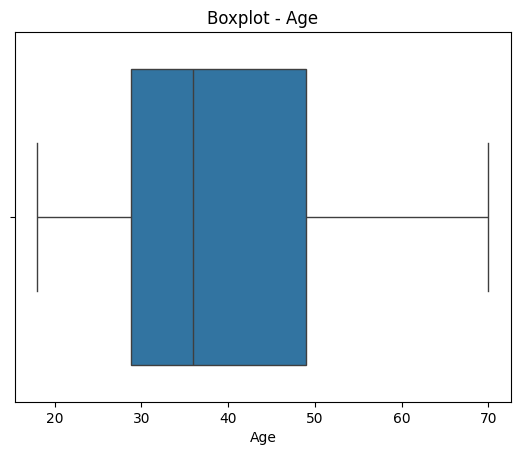

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이상치 확인을 위해 박스플롯을 이용.
# custormerID는 고유한 것이므로. Age, Annual Income, Spending Score 를 확인

# Age 열의 이상치 시각화
sns.boxplot(x=df['Age'])
plt.title('Boxplot - Age')
plt.show()

# 이상치가 보이지 않는다 (박스 밖의 수염 끝 보다 떨어져 있는 점이 존재하지 X)

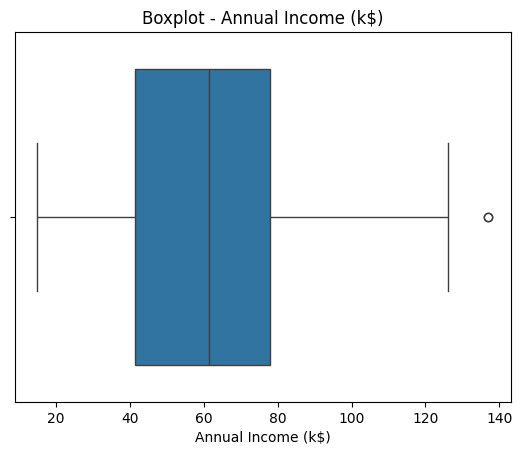

In [9]:
# Annual Income 열의 이상치 시각화
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot - Annual Income (k$)')
plt.show()

# 이상치가 존재한다. 
# Annual Income이 137인 값이 2개 존재

In [10]:
# Annual Income 열에 2개의 이상치가 존재하는 것을 확인
# 연소득만 추출
income = df['Annual Income (k$)']

# Q1, Q3, IQR 계산
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치만 추출
outliers = df[(income < lower_bound) | (income > upper_bound)]
print(outliers)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


In [11]:
# 이상치 제외한 데이터
df_clean = df[(income >= lower_bound) & (income <= upper_bound)]

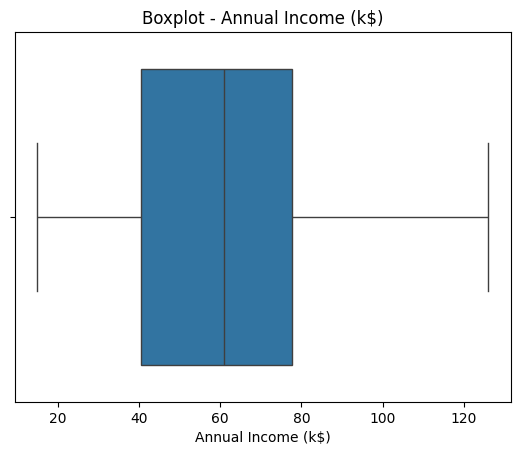

In [12]:
# Annual Income 열의 이상치 시각화
sns.boxplot(x=df_clean['Annual Income (k$)'])
plt.title('Boxplot - Annual Income (k$)')
plt.show()

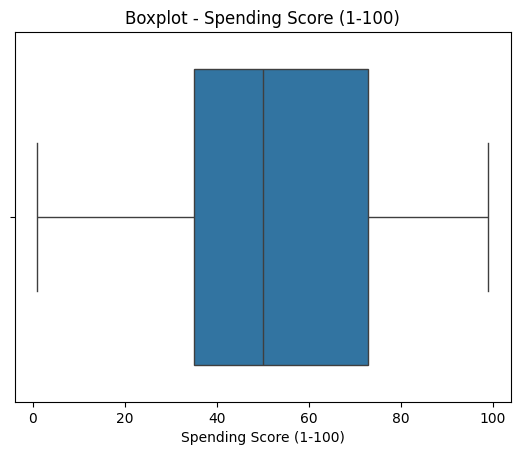

In [13]:
# Spending Score 열의 이상치 시각화
sns.boxplot(x=df_clean['Spending Score (1-100)'])
plt.title('Boxplot - Spending Score (1-100)')
plt.show()

# 이상치가 존재하지 않는다.

### 데이터의 기본 구조를 파악.
- 결측값은 존재하지 않는다.
- Annual Income 에 이상치 2개가 존재해서 IQR 기반 이상치 제거를 실행
- 그 외 이상치는 존재 X
- 데이터 타입
    - CustomerID                 int64
    - Gender                    object   # 범주형이니 OneHotEncoding 필요!
    - Age                        int64
    - Annual Income (k$)         int64
    - Spending Score (1-100)     int64
- 데이터 크기
    : 데이터셋은 (200, 5)  로 구성


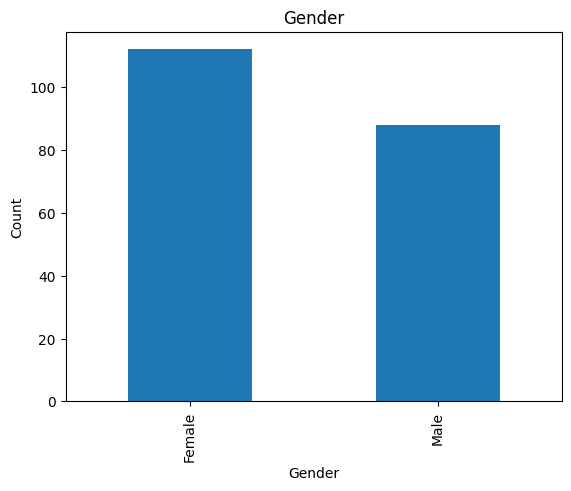

In [14]:
# 데이터 분포 확인. Gender
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender")
plt.ylabel("Count")
plt.show()

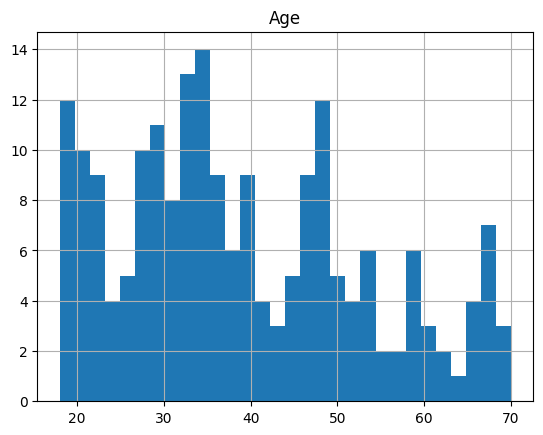

In [15]:
# 3. 데이터 분포 확인 (히스토그램)

# Age 분포 확인 - 히스토그램 + 커널 밀도
df_clean['Age'].hist(bins=30)
plt.title('Age')
plt.show()

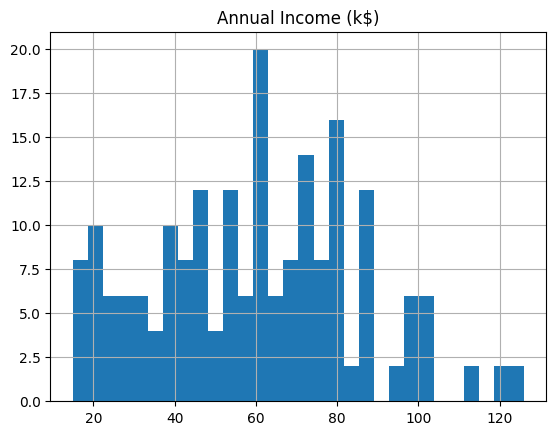

In [16]:
# Annual Income 분포 확인
df_clean['Annual Income (k$)'].hist(bins=30)
plt.title('Annual Income (k$)')
plt.show()

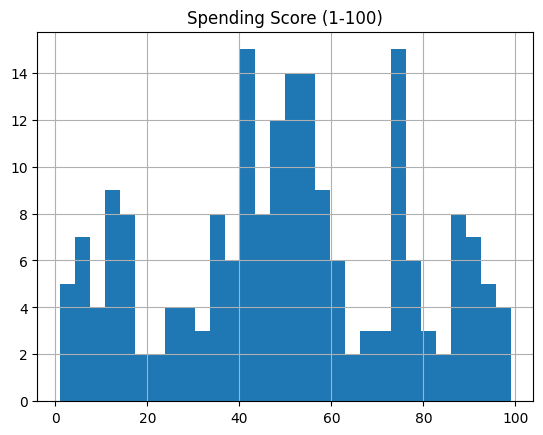

In [17]:
# Spending Score (1-100) 분포 확인
df_clean['Spending Score (1-100)'].hist(bins=30)
plt.title('Spending Score (1-100)')
plt.show()

In [18]:
# 기초 통계량 계산
from scipy.stats import skew, kurtosis

def compute_statistics(series):
    return {
        "평균": series.mean(),                       # 평균
        "중앙값": series.median(),                   # 중앙값 (중간 값)
        "최빈값": series.mode().iloc[0],             # 최빈값 (가장 많이 나오는 값)
        "분산": series.var(),                        # 분산 (흩어짐 정도)
        "표준편차": series.std(),                    # 표준편차 (분산의 제곱근)
        "왜도": skew(series),                        # 왜도 (비대칭 정도)
        "첨도": kurtosis(series)                     # 첨도 (꼭대기의 뾰족함)
    }
    
# 나이 통계
stats_age = compute_statistics(df_clean['Age'])

# 연소득 통계
stats_income = compute_statistics(df_clean['Annual Income (k$)'])

# 소비 점수 통계
stats_score = compute_statistics(df_clean['Spending Score (1-100)'])

# 결과를 보기 쉽게 정리
summary_stats = pd.DataFrame({
    "Age": stats_age,
    "Annual Income (k$)": stats_income,
    "Spending Score (1-100)": stats_score
})

# 결과 출력
summary_stats


,Age,Annual Income (k$),Spending Score (1-100)
평균,38.929293,59.787879,50.196970
중앙값,36.000000,61.000000,50.000000
최빈값,32.000000,54.000000,42.000000
분산,196.472132,636.919243,662.900092
표준편차,14.016852,25.237259,25.746846
왜도,0.466717,0.172944,-0.047979
첨도,-0.704780,-0.437278,-0.813661


### 3. 데이터 분포 정리 (기초 통계량)
- Age
    - 중앙값 < 평균 : 약간 오른쪽으로 치우친 분포
    - 왜도 +.047 : 오른쪽 꼬리가 조금 더 긴 양의 비대칭 분포
    - 첨도 -0.7 : 정규분포보다 덜 뽀죡한 평평한 분포
    => 다양한 연령대가 포함, 약간 고령층의 영향이 있는 분포(히스토그램도 확인해야 한다.)
- Annual Income
    - 평균 ≈ 중앙값: 거의 대칭적인 분포
    - 왜도 +0.17: 거의 정규분포에 가까운 분포, 약간의 양의 치우침
    - 첨도 -0.44: 평평한 분포, 극단값이 적음
    => 다양한 소득층이 있으나, 과도한 고소득자는 적음
- Spending Score
    - 평균 ≈ 중앙값: 정규분포에 매우 가까운 분포
    - 왜도 -0.048: 거의 0 → 완전히 대칭적
    - 첨도 -0.81: 평평한 분포, 극단 소비자(매우 높거나 낮은 점수)는 적음
    => 전체적으로 소비 패턴이 고르게 퍼져 있으며 극단적 소비 성향은 적음

### 3. 데이터 분포 정리 (히스토그램)
- Age
    - 20대, 30대 중반, 50대에 고객이 집중
    - 기초 통계량 으로는 정확하지 않다. 히스토그램으로 판단!
    > 특정 연령대에 몰려 있다
- Annual Income
    - 고르게 퍼져 있으나 고소득층은 드묾다.
    - 이상치 2개가 존재 (존재 했으나 제거.)
    > 다양하나 소득 계층이 존재
- Spending Score
    - 낮거나 높은 점수에 치우친 그룹도 일부 존재.
    > 소비 행동이 뚜렷하게 그룹화 되어 있다.

In [19]:
# gender와 다른 변수 간의 관계를 확인하기 위해
# Label Encoding을 통해 변환
df_clean['Gender_encoded'] = df_clean['Gender'].map({'Male':0, 'Female':1})

C:\Users\ez\AppData\Local\Temp\ipykernel_20492\4093352227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Gender_encoded'] = df_clean['Gender'].map({'Male':0, 'Female':1})


In [20]:
df_clean

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encoded
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
193,194,Female,38,113,91,1
194,195,Female,47,120,16,1
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1


### 변수 간 상관계수 해석. (상관행렬)

- Gender_encoded ↔ Age : -0.068
    - 성별과 나이는 거의 무관. 여성일수록 조금 더 어린 경향이 있으나 통계적으로 의미 없음

- Gender_encoded ↔ Annual Income  :   -0.024	
    - 성별과 연간 수입도 거의 관계 없음
    
- Gender_encoded ↔ Spending Score	:   0.059
    - 여성일수록 소비 점수가 약간 높은 경향이 있으나 미미함
- Age ↔ Spending Score	-0.329	
    - 나이가 많을수록 소비 점수가 낮아지는 경향이 명확하게 있음 (중간 정도의 음의 상관)
- Annual Income ↔ Spending Score	:   0.010	
    - 수입과 소비성향은 거의 무관. 고소득자가 꼭 소비 점수가 높지는 않음

=> 단일 변수 간의 직접적인 선형 관게는 약하거나 없다!

- **상관행렬이 아닌 다른 방법으로 상관관계 분석 (히트맵, 산점도)**
- **여려 변수 기반으로 패턴을 그룹화 해서 상관관계를 분석해야 한다.(K-means)**

In [21]:
# 4. 변수 간 관계 탐색 (상관계수, 히트맵, 산점도)
df_copy = df_clean.copy() # 원본 훼손 방지

# 상관계수 분석을 위한 수치형 변수들 선택
numerical_features = ['Gender_encoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# 상관계수 행렬 계산
correlation_matrix = df_copy[numerical_features].corr()

# 상관계수 행렬 출력
print("변수 간 상관계수 행렬:")
print(correlation_matrix)

변수 간 상관계수 행렬:
                        Gender_encoded       Age  Annual Income (k$)  \
Gender_encoded                1.000000 -0.067835           -0.024384   
Age                          -0.067835  1.000000            0.004406   
Annual Income (k$)           -0.024384  0.004406            1.000000   
Spending Score (1-100)        0.059092 -0.329421            0.010080   

                        Spending Score (1-100)  
Gender_encoded                        0.059092  
Age                                  -0.329421  
Annual Income (k$)                    0.010080  
Spending Score (1-100)                1.000000  


### 산점도로 상관관계 분석
<table>
  <tr>
    <th></th>
    <th>Age</th>
    <th>Income</th>
    <th>Score</th>
  </tr>
  <tr>
    <th>Age</th>
    <td>[Age 분포]</td>
    <td>[Age vs Income]</td>
    <td>[Age vs Score]</td>
  </tr>
  <tr>
    <th>Income</th>
    <td>[Income vs Age]</td>
    <td>[Income 분포]</td>
    <td>[Income vs Score]</td>
  </tr>
  <tr>
    <th>Score</th>
    <td>[Score vs Age]</td>
    <td>[Score vs Income]</td>
    <td>[Score 분포]</td>
  </tr>
</table>


---
**분포 비교**
1. Age (나이)
- 남성(Male, 파랑): 50대 이상까지 넓게 분포, 평균 연령이 높음

- 여성(Female, 빨강): 20~40대에 집중, 젊은 고객이 많음
>  여성은 젊은 층 중심, 남성은 중장년층 분포가 넓음

2. Annual Income (k$)
- 남성과 여성이 비슷한 범위에 있지만,

- 남성이 약간 더 고소득 분포 쪽으로 치우침

> 수입은 성별 차이 거의 없음, 다만 고소득 남성이 조금 더 많음

3. Spending Score (1-100)
- 여성의 소비 점수가 좀 더 고르게 퍼짐, 고점도 많음

- 남성은 양극화(매우 낮거나 높거나)된 경향

> 여성이 전체적으로 소비 성향이 더 활발
---
**변수 간 상관관계 분석**

1. Age vs Annual Income
- 명확한 선형 관계 없음 (상관계수 ≈ 0)

- 성별에 따른 차이도 뚜렷하지 않음

2. Age vs Spending Score
- 나이가 많을수록 소비 성향은 낮아지는 경향

- 특히 여성은 젊을수록 소비 성향이 높음
- 남성은 고령에서도 일부 고소비자가 있음

> Age ↘, Score ↗ (특히 여성)

3. Annual Income vs Spending Score
- 소득과 소비 점수는 비선형 관계

- 고소득자 중 저소비자도 많고, 저소득이지만 고소비인 경우도 존재

- 여성은 소비 점수 중간 이상에 많이 분포

> 소득 ≠ 소비 성향, 개인 성향이 더 영향 큼

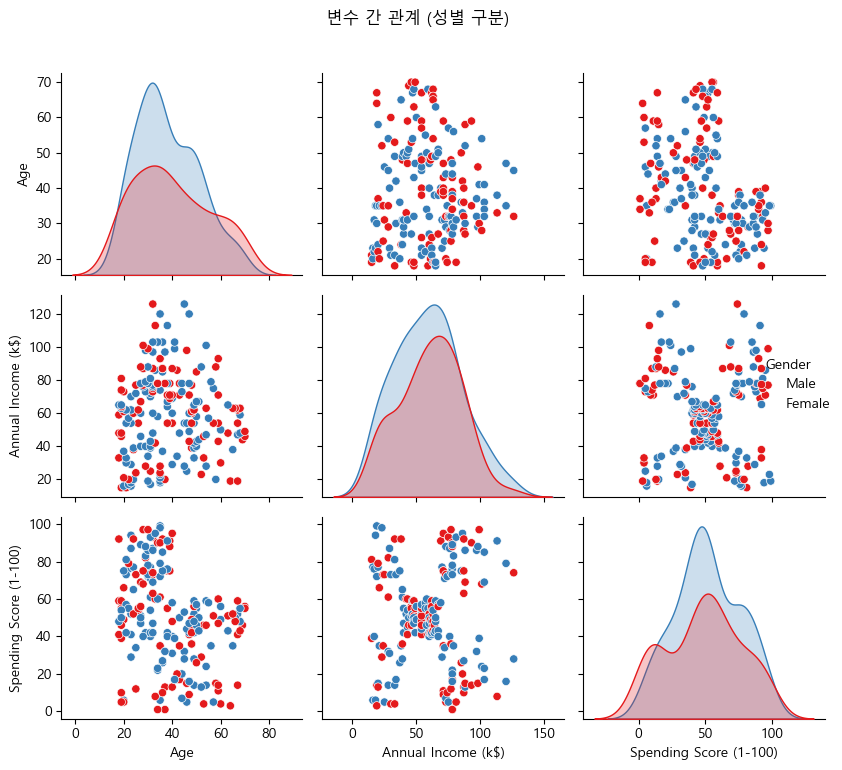

In [22]:
# 남자가 파란색, 여자가 빨간색
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

sns.pairplot(
    df_copy[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']],
    hue='Gender',
    palette='Set1'
)
plt.suptitle('변수 간 관계 (성별 구분)', y=1.02)
plt.tight_layout()
plt.show()


### 히트맵을 통한 상관관계 시각화
남성 고객 상관 관계 해석
- Age ↔ Spending Score      -0.28      
    - 나이가 많을 수록 소비 점수가 낮은 경향 있음
- Age ↔ Annual Income       -0.06	
    - 사실상 무관
- Annual Income ↔ Spending Score        -0.03
    - 거의 관계 없음
> 남성 고객은 나이가 많을 수록 소비가 줄어드는 경향이 있으나,
> 소득과 소비 간의 관계는 없다
---
여성 고객 상관 관계 해석
- Age ↔ Spending Score	-0.38	
    - 더 강한 음의 상관관계 → 젊을수록 소비 성향이 확실히 높음
- Age ↔ Annual Income	0.06	
    - 무시할 수준의 미미한 양의 상관
- Annual Income ↔ Spending Score	0.05	
    - 거의 무관
> 여성은 나이가 젊을수록 소비 성향이 훨씬 강함.
> 마찬가지로 소득과 소비는 거의 무관

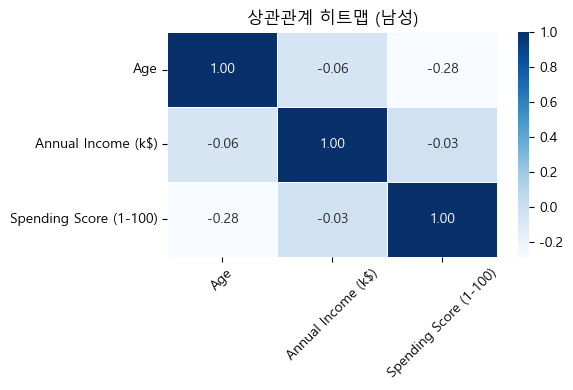

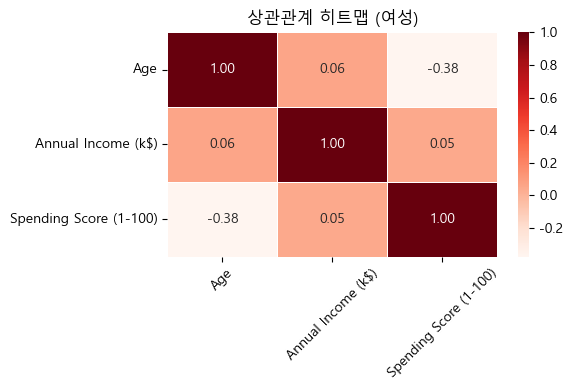

In [23]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 남성 데이터만 필터링
male_df = df_clean[df_clean['Gender'] == 'Male']
# 여성 데이터만 필터링
female_df = df_clean[df_clean['Gender'] == 'Female']

# 상관관계 히트맵: 남성
plt.figure(figsize=(6, 4))
sns.heatmap(
    male_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(),
    annot=True, cmap='Blues', fmt=".2f", linewidths=0.5
)
plt.title('상관관계 히트맵 (남성)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 상관관계 히트맵: 여성
plt.figure(figsize=(6, 4))
sns.heatmap(
    female_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(),
    annot=True, cmap='Reds', fmt=".2f", linewidths=0.5
)
plt.title('상관관계 히트맵 (여성)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 성별에 따른 변수 간 관계 분석 결과
**공통적 결과**
- 소득은 소비 성향을 설명하지 못한다. 
- 나이가 소비 성향에 중요한 변수 (특히 여성)
- 여성은 중간 이상 소비 점수 분포가 뚜렷하므로, 젊은 여성층이 주요 소비계층이다.
- 남성은 소비가 양극화 되므로, 이원화된 전략이 필요하다(VIP?)

**남성 (히트맵 기반 상관관계)**
    - 남성은 나이가 들수록 소비가 줄어드는 경향이 있으나, 소득은 소비에 영향을 거의 주지 않는다.

**여성 (히트맵 기반 상관관계)**
    - 여성은 특히 나이가 소비 성향에 큰 영향을 주며, 소득과 소비는 관련 없다.

**산점도 기반**
    - 소비 성향은 나이의 영향을 많이 받으며, 특히 여성은 젊을 수록 명확히 고소비 성향을 보인다. 소득은ㅇ 소비 성향을 예측하는 데 도움이 되지 않는다.

---
여기부터는 다른 내용! 
- 좀 더 다르게 분석 (KMeans 적용)

In [24]:
# 전체 구조 군집화를 위해 KMeans를 사용

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 클러스터링 대상 변수
features = df_copy[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 정규화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans 모델 훈련
kmeans = KMeans(n_clusters=5, random_state=42)
df_copy['Cluster'] = kmeans.fit_predict(scaled_features)

In [25]:
# 군집별 상관 관계 확인을 위한 시각화
# 피벗테이블, 산점도, pairplot

# 성별에 따른 평균 집계 (피벗 테이블)
pivot_gender = df_copy.pivot_table(
    values=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    index='Gender',
    aggfunc='mean'
)

display(pivot_gender)

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,40.011628,60.488372,48.465116


### 산점도 (kMeans 클러스터링) 그룹을 5개로 나눔 
- X축 : Annual Income : 고객의 연간 소득
- Y축 : Spending Score : 소비 점수
---
- 산점도 요약 (남자)
    - Cluster 0 : 57.6세 - 	중장년층, 중간 소비 성향. 실속형 소비 가능성
    - Cluster 1	: 33.2세 - 	젊고 고소득, 소비 성향 매우 높음. 핵심 타겟 
    - Cluster 2	: 24.4세 - 	20대 초반, 낮은 소득이나 소비 적극적
    - Cluster 3	: 52.5세 - 	50대 이상, 저소득 + 저소비. 관심도 낮음
    - Cluster 4	: 39.6세 - 	고소득이지만 소비 적음. 무관심층 또는 고급 선호층
---
- 산점도 요약 (여자)
    - Cluster 0	: 53.6세 - 중장년 여성, 중간 소비.
    - Cluster 1	: 32.5세 -	젊은 고소득층, 소비 점수 매우 높음 
    - Cluster 2	: 25.9세 - 	20대 초중반, 저소득이나 적극 소비  
    - Cluster 3	: 42.4세 -	중장년 여성, 저소득 + 소비 적음 
    - Cluster 4	: 40.3세 -	고소득이지만 소비 낮음
---
> 전반적으로 여성은 남성보다 클러스터 1,2 영역에 더 많이 분포 -> 소비 성향 강한 고객 비중이 높음 

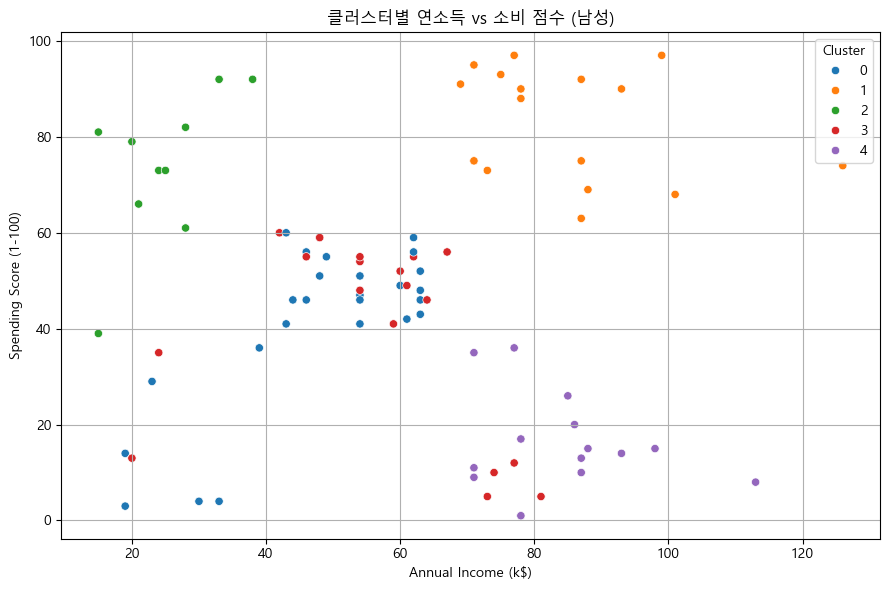

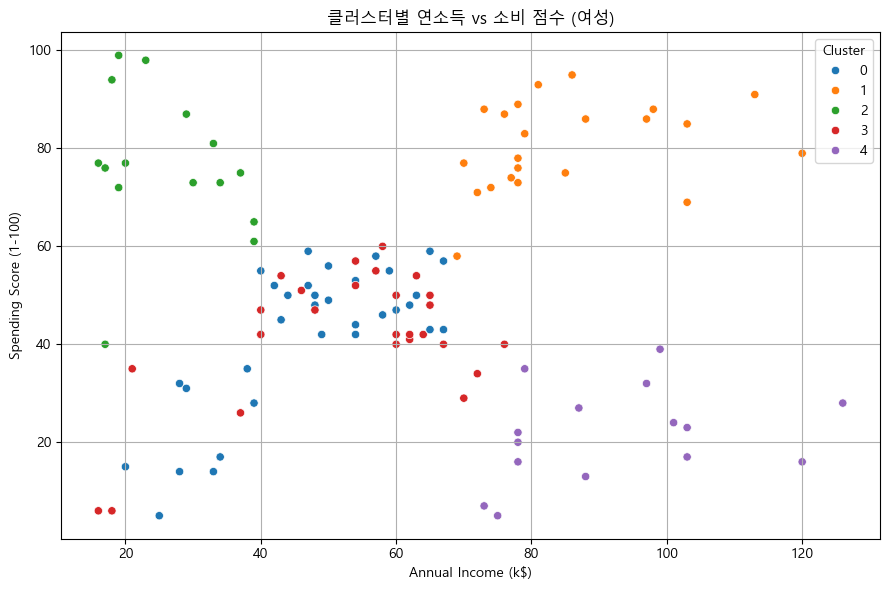

In [26]:
# 성별별 연소득과 소득점수 시각화 산점도

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

# 남성만 필터링
male_df = df_copy[df_copy['Gender'] == 'Male']

plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=male_df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10'
)
plt.title('클러스터별 연소득 vs 소비 점수 (남성)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 여성만 필터링
female_df = df_copy[df_copy['Gender'] == 'Female']

plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=female_df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10'
)
plt.title('클러스터별 연소득 vs 소비 점수 (여성)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 페어플롯 
- 변수 간 관계를 한눈에 확인
- 데이터셋의 모든 수치형 변수 간의 관계를 시각화

페어플롯(남자)
- 1. Age 분포
    - Cluster 0 (파랑): 50~70세 중장년 남성이 중심
    - Cluster 2 (초록): 20대 초반 중심 → 젊은 소비층
    - Cluster 1, 4 (주황/보라): 30~40대가 주축, 비교적 젊은 고소득자

2. Annual Income vs Spending Score
    - Cluster 1: 고소득 + 고소비 (오른쪽 위)
    - Cluster 4: 고소득 + 저소비 (오른쪽 아래)
        > 이 두 그룹은 소득은 비슷하지만 소비 성향이 완전히 반대
    - Cluster 2: 저소득 + 고소비 (왼쪽 위)
        >  젊고 감성소비 성향 강한 남성 고객

3. Age vs Spending Score
    - Cluster 0/3은 고령층이며 소비 성향은 낮거나 평균적

    - Cluster 2는 가장 어린 연령이지만 소비 성향은 가장 활발
---
페어플롯(여자)
1. Age 분포
    - 전반적으로 남성보다 더 고르게 분포 (20대~60대)
    - Cluster 1, 2: 20~30대가 주력 → 트렌디 소비층
    - Cluster 0, 4: 중장년 여성이 주축

2. Annual Income vs Spending Score
    - Cluster 1 (주황): 고소득 + 고소비
        > 여성에서는 이 클러스터가 가장 눈에 띔
    - Cluster 4 (보라): 고소득 + 저소비 → 브랜드 관심도 낮은 여성

3. Age vs Spending Score
    - Cluster 2는 20대 초반 여성 고객, 소비 성향 가장 강함
    - Cluster 0은 50대 여성, 소비 성향은 중간
    - 여성은 전체적으로 소비 성향이 남성보다 다양하고 분산되어 있음

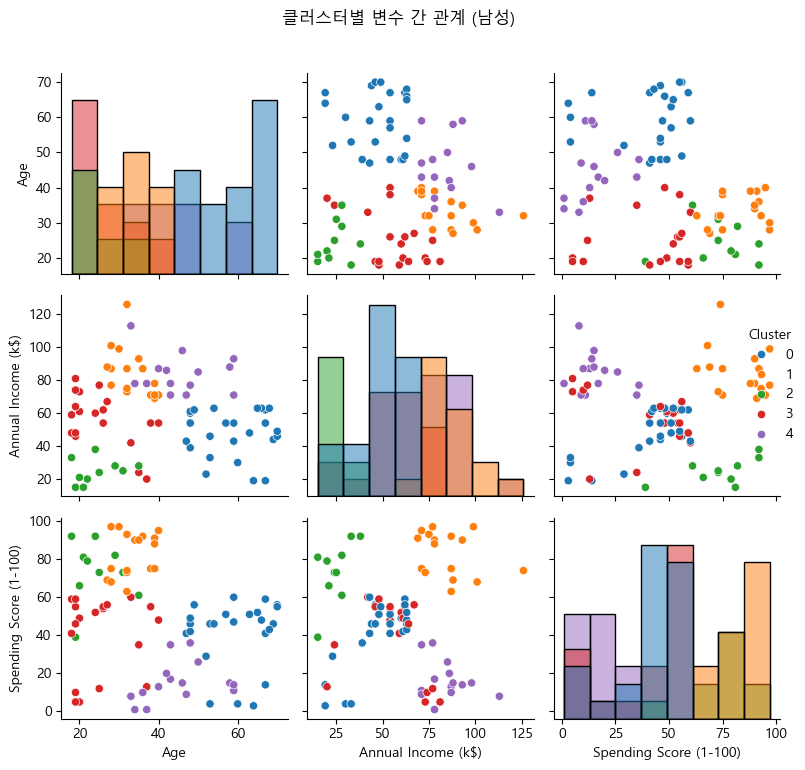

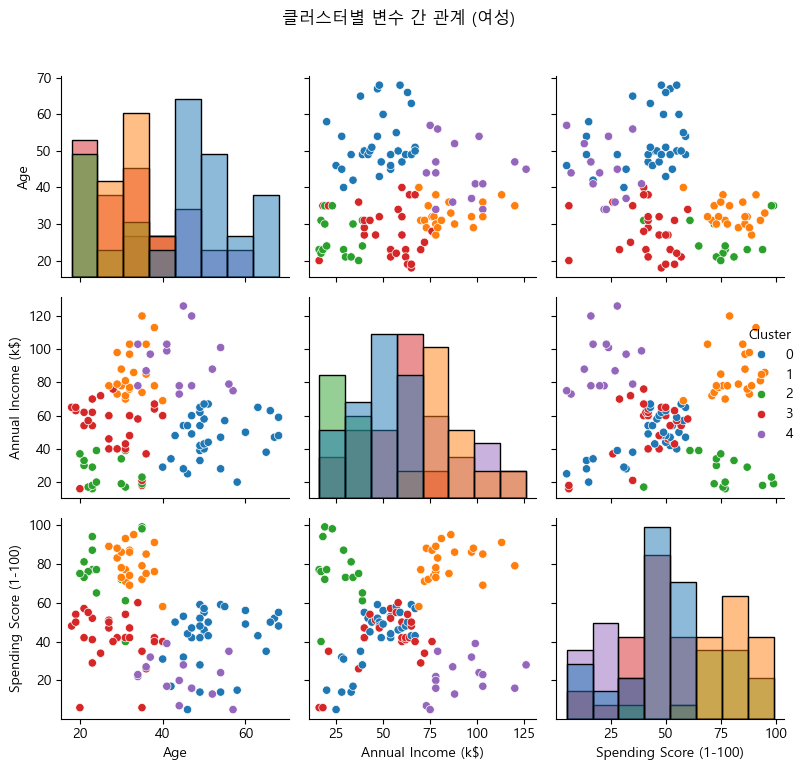

In [27]:
# 페어 플롯
# 변수 간 관계를 한눈에 확인
# 데이터셋의 모든 수치형 변수 간의 관계를 시각화

# 남성 데이터만 필터링
male_df = df_copy[df_copy['Gender'] == 'Male']

# 남성 페어플롯
sns.pairplot(
    data=male_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']],
    hue='Cluster',
    palette='tab10',
    diag_kind='hist'
)
plt.suptitle("클러스터별 변수 간 관계 (남성)", y=1.02)
plt.tight_layout()
plt.show()

# 여성 데이터만 필터링
female_df = df_copy[df_copy['Gender'] == 'Female']

# 여성 페어플롯
sns.pairplot(
    data=female_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']],
    hue='Cluster',
    palette='tab10',
    diag_kind='hist'
)
plt.suptitle("클러스터별 변수 간 관계 (여성)", y=1.02)
plt.tight_layout()
plt.show()


### 히트맵 : 변수간 상관관계 분석
- 여러 변수 간의 상관관계를 확인


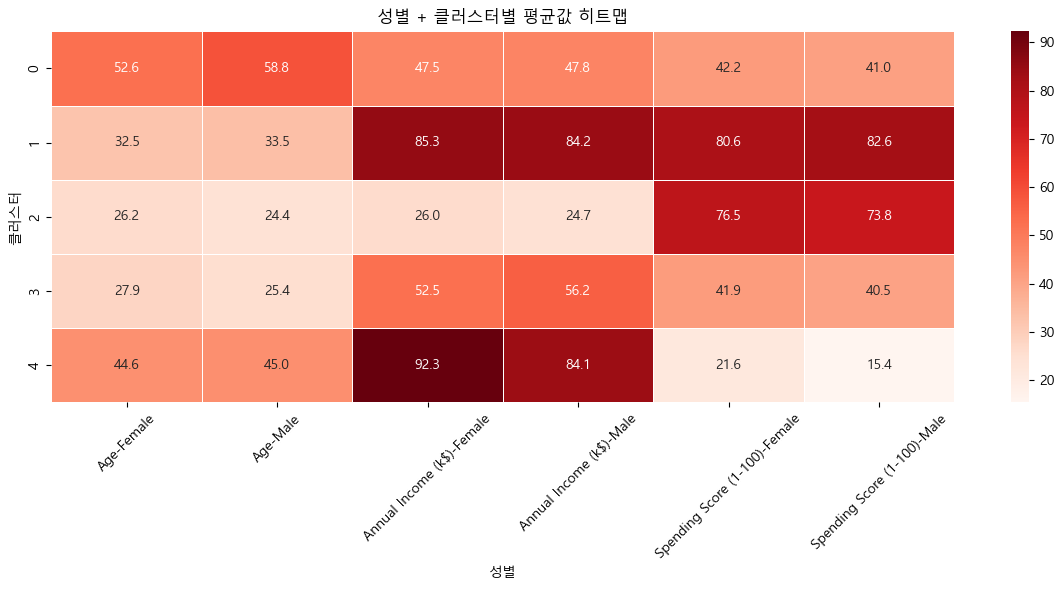

In [28]:
# 성별 + 클러스터별 평균 계산
cluster_gender_means = df_copy.groupby(['Gender', 'Cluster'])[
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
].mean().round(1)

# 인덱스 재정렬 및 피벗 형태로 변환 (시각화에 편하게)
heatmap_data = cluster_gender_means.reset_index().pivot_table(
    index='Cluster',
    columns='Gender',
    values=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
)

# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='Reds', linewidths=0.5)
plt.title('성별 + 클러스터별 평균값 히트맵')
plt.xlabel('성별')
plt.ylabel('클러스터')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()